In [1]:
import os
import sys

# Step 1: Set project root path (go up one level from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(),"..",".."))

# Step 2: Add project root to system path
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import sys
import os

# Add src folder to path
sys.path.append(os.path.abspath('../../src'))

# Task 2: Convert Telegram Messages to Tokenized Format for CoNLL Annotation

## Objective
This script prepares the selected top messages (from each Telegram channel) for manual annotation in CoNLL format. It performs the following steps:
- Reads the pre-selected messages from a CSV file.
- Removes metadata columns (`channel_username`, `text_length`).
- Tokenizes each message into individual words.
- Writes the output in a token-per-line format with blank lines separating messages, making it ready for manual labeling.

---

## Steps Performed

1. **Load the Dataset**
   - Reads the `top_30_messages_per_channel.csv` file using `pandas`.

2. **Drop Unnecessary Columns**
   - Removes `channel_username` and `text_length` columns which are not required for annotation.

3. **Tokenization and Export**
   - Each message in the `text` column is split into tokens (words).
   - Each token is written on a new line.
   - A blank line is added after each message to follow the CoNLL format convention.

---

## Output
The processed messages are saved to text format.


In [3]:
import pandas as pd

# This will auto-detect column names correctly from your existing CSV
df = pd.read_csv(r"C:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor\data\processed\top_30_messages_per_channel.csv")

import pandas as pd
from coNLL import export_conll_tokens
# Export tokenized messages
export_conll_tokens(df, "conll_ready_tokenized.txt")


c:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor-clean\src\visualization.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


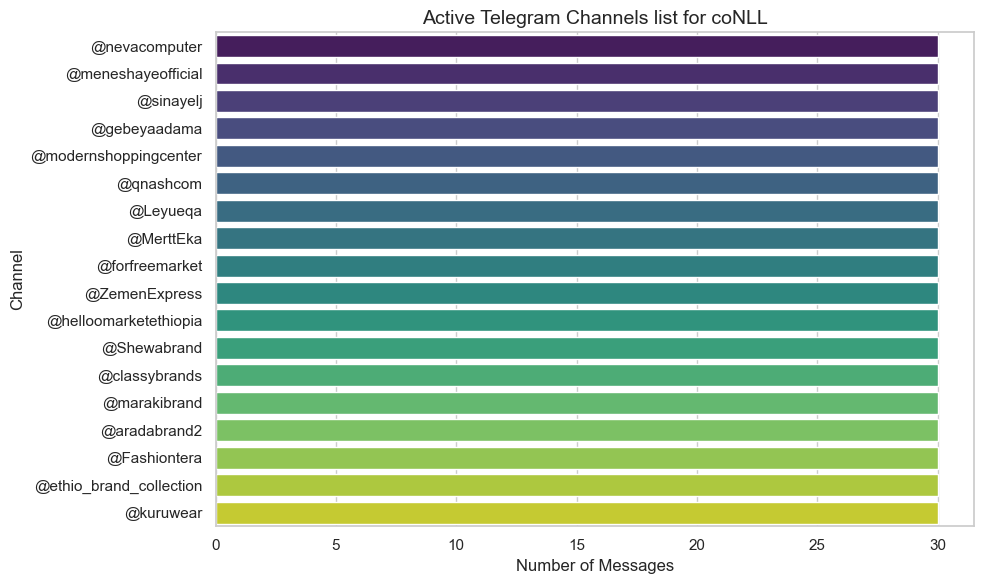

In [4]:
from visualization import plot_channel_message_distribution,plot_top_words
import pandas as pd



plot_channel_message_distribution(
    df,
    top_n=30,
    title="Active Telegram Channels list for coNLL",
    save_path="channel_distribution.png"
)


c:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor-clean\src\visualization.py:73: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from font(s) Abyssinica SIL.
  plt.tight_layout()
c:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor-clean\src\visualization.py:73: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) Abyssinica SIL.
  plt.tight_layout()
c:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor-clean\src\visualization.py:73: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from font(s) Abyssinica SIL.
  plt.tight_layout()
c:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor-clean\src\visualization.py:73: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Abyssinica SIL.
  plt.tight_layout()
c:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor-clean\src\visualiza

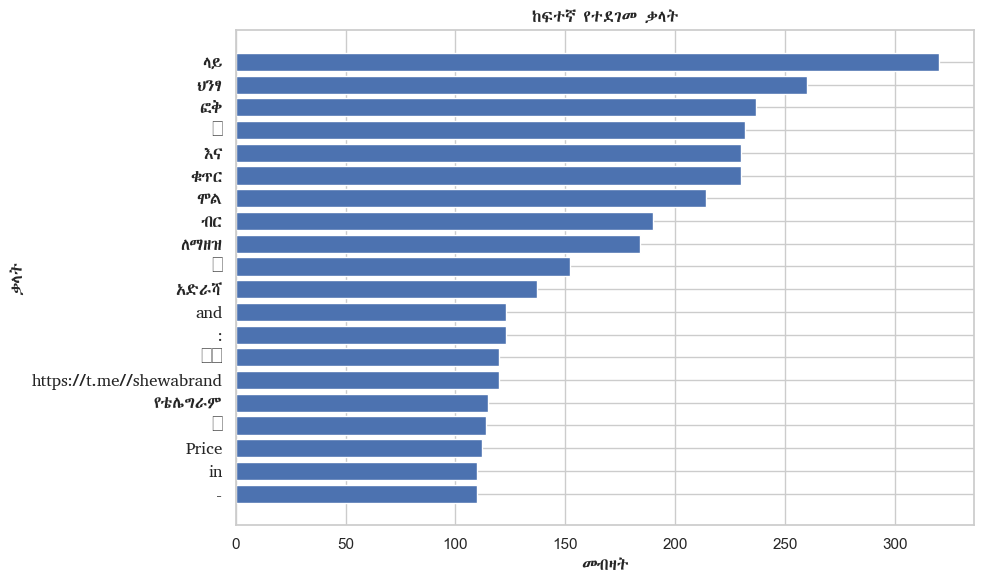

In [5]:
from visualization import plot_top_words

plot_top_words(
    df,
    text_column="text",
    top_n=20,
    title="ከፍተኛ የተደገመ ቃላት",
    font_path=r"C:\Users\ABC\Downloads\AbyssinicaSIL-2.300\AbyssinicaSIL-2.300\AbyssinicaSIL-Regular.ttf"
)




## Labeling Schema

Below is the list of all entity labels to be used during annotation:

- **O**: Outside of any entity
- **B-PRODUCT**, **I-PRODUCT**: Product name or type
- **B-AUDIENCE**: Intended user or target group (e.g., "ህጻናት", "ሴቶች")
- **B-BRAND**, **I-BRAND**: Brand or company names
- **B-COMPONENT**, **I-COMPONENT**: Specific product components or ingredients
- **B-TASK**, **I-TASK**: Actions the user is asked to take (e.g., “ይደውሉ”, “ላኩ”)
- **B-CONTACT_INFO**: Contact methods such as phone numbers or Telegram usernames
- **B-PRICE**, **I-PRICE**: Monetary values or product prices
- **B-LOC**, **I-LOC**: Location or area mentions
- **B-DATE**, **I-DATE**: Dates or time references
- **B-FEATURE**, **I-FEATURE**: Product specifications or special features
- **B-ATTRIBUTE**, **I-ATTRIBUTE**: Qualitative descriptors or product characteristics

## Output Path
The top 30 messages per channel are saved to the following location for labeling with the above label.



In [6]:
import pandas as pd
# This will auto-detect column names correctly from your existing CSV
df_nocoll = pd.read_excel(r"C:\Users\ABC\Downloads\Untitled spreadsheet.xlsx")


In [7]:
df_nocoll.head(15)

,A,Label
0,Acer,B-Product:
1,Nitro,B-Product:
2,5,B-Product:
3,Display,o
4,🖥️,o
5,15.6”,B-Product
6,Full,I-Product
7,HD,I-Product
8,(1920×1080),I-Product
9,IPS,I-Product


In [8]:
#Drop any rows where the 'Label' column is null or empty
df_nocoll= df_nocoll.dropna(subset=['Label'])
df_nocoll = df_nocoll[ df_nocoll['Label'].astype(str).str.strip() != ""]

# Count how many tokens are labeled with non-"O" labels (i.e., actually annotated)
labeled_count = ( df_nocoll['Label'] != 'O').sum()

# Total tokens
total_tokens = len( df_nocoll)
total_tokens

763

# Task 2: Post-Labeling Cleanup and Label Coverage Analysis

## Objective
After manually labeling tokens with their respective entity tags (e.g., `B-PRODUCT`, `I-PRICE`, etc.), this script performs data cleanup and provides summary statistics. It ensures the dataset is free from incomplete annotations and gives insight into the proportion of tokens that were actually labeled with an entity (i.e., not just marked as "O").

---

## Steps Performed

1. **Remove Unlabeled Rows**
   - Any rows where the `Label` column is missing (`NaN`) or empty (`""`) are removed.
   - This ensures the final dataset only contains valid token-label pairs.

2. **Count Labeled Tokens**
   - Calculates the number of tokens that have been labeled with something **other than** `"O"` (outside any entity).
   - This count represents tokens that are part of actual entities.

3. **Calculate Total Tokens**
   - Counts the total number of tokens remaining in the dataset after cleanup.

---

## Metrics

- **`labeled_count`**: Number of tokens annotated with real entity labels (not "O").
- **`total_tokens`**: Total number of token-label rows after cleaning.

These values are useful to:
- Check annotation completeness.



In [9]:
labeled_count

np.int64(409)

In [10]:
coverage = labeled_count / total_tokens
print(f"Labeled token coverage: {coverage:.2%}")


Labeled token coverage: 53.60%


53.60% of the tokens are labeled with actual entity tags (like B-PRODUCT, I-LOC, etc.)

46.40% of the tokens are labeled as 'O', meaning they are not part of any named entity.

In [ ]:
output_path = r"C:\Users\ABC\Desktop\10Acadamy\week 4\-Amharic-E-commerce-Data-Extractor\data\processed\conull.csv"
df_nocoll.to_csv(output_path, index=False)
